In [1]:
from pandas_datareader import data as wb
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import threading, time
from matplotlib import pyplot as plt
from pylab import rcParams
from textblob import TextBlob
from selenium import webdriver

In [2]:
tickers = ['AAPL', 'F', 'NFLX', 'MSFT', 'TSLA']

ticker_dict = {
    'AAPL' : 'Apple',
    'F' : 'Ford',
    'NFLX' : 'Netflix',
    'MSFT' : 'Microsoft',
    'TSLA' : 'Tesla'
}

print('Get the most recent sentiment on a specific company. Enter an integer:')
print('0 : AAPL (Apple)')
print('1 : F (Ford)')
print('2 : NFLX (Netflix)')
print('3 : MSFT (Microsoft)')
print('4 : TSLA (Tesla)\n')
val = int(float(input('')))
print('You chose:\n{0} : {1}\n'.format(str(val), ticket_dict[val]))
name = ticker_dict.get(tickers[val])
driver = webdriver.Firefox(executable_path='./geckodriver')
site = 'https://finance.yahoo.com'
driver.get(site)

try:
    driver.find_element_by_xpath('//button[@name="agree"]').click()
except:
    pass

for scroll in range(20):
    driver.execute_script('window.scrollBy(0, 2000)')
    time.sleep(2)

link_elems = driver.find_elements_by_xpath('//ul/li/div/div/div/h3/a')
evals_arr = []
zeroes = []
ones = []
k = 1

eval_dict = {
    0 : 'Bad',
    1 : 'Good',
    None : 'Neutral'
}

for elem in link_elems:
    if not 'finance.yahoo' in elem.get_attribute('href'):
        pass
    if name.upper() in elem.text.upper():
        print('Article name: ' + elem.text)
        driver2 = webdriver.Firefox(executable_path='./geckodriver')
        driver2.get(elem.get_attribute('href'))
            
        try:
            driver2.find_element_by_xpath('//button[@name="agree"]').click()
        except:
            pass
        
        print('Yahoo Finance {0} article {1} opened.'.format(name, k))
        article_text = driver2.find_elements_by_xpath('//article/div/p')
        file = open('current_text.txt', 'w')

        for p in article_text:
            if p.get_attribute('content')[:7] == '<a href':
                break
            file.write(site+elem.text+' ')

        file.close()
        file = open('current_text.txt', 'r')

        polarity = TextBlob(file.read()).sentiment.polarity

        if polarity < 0:
            eval_int = 0
        elif polarity > 0:
            eval_int = 1
        else:
            eval_int = None

        evals_arr.append(eval_int)

        print('{0} article {1} sentiment: {2}.\n'.format(name, str(k), eval_dict.get(eval_int)))
        k += 1

        driver2.close()

driver.close()
file = open('current_text.txt', 'w')
file.close()
            
for evaluation in evals_arr:
    if evaluation == 0:
        zeroes.append(evaluation)
    elif evaluation == 1:
        ones.append(evaluation)

if len(ones) > len(zeroes):
    overall_eval_int = 1
elif len(zeroes) > len(ones):
    overall_eval_int = 0
else:
    overall_eval_int = None

print('Current {0} sentiment: {1}.'.format(name, eval_dict.get(overall_eval_int)))

Get the most recent sentiment on a specific company. Enter an integer:
0 : AAPL (Apple)
1 : F (Ford)
2 : NFLX (Netflix)
3 : MSFT (Microsoft)
4 : TSLA (Tesla)
2


Article name: Netflix Shares Plunge Most in a Year After U.S. Customers Leave Service
Yahoo Finance Netflix article 1 opened.
Netflix article 1 sentiment: Good.

Article name: Netflix’s Tight-Lipped Culture Makes It Hard to Avoid Surprises
Yahoo Finance Netflix article 2 opened.
Netflix article 2 sentiment: Bad.

Article name: 'Stranger Things' could've saved Netflix's disappointing quarter
Yahoo Finance Netflix article 3 opened.
Netflix article 3 sentiment: Bad.

Article name: Wedbush analyst on Morgan Stanley's Netflix stock call: It's 'idiotic'
Yahoo Finance Netflix article 4 opened.
Netflix article 4 sentiment: Bad.

Current Netflix sentiment: Bad.


In [3]:
adj_close_data = wb.DataReader(tickers[val], data_source='yahoo', start='1995-1-1')['Adj Close']

<function matplotlib.pyplot.show(*args, **kw)>

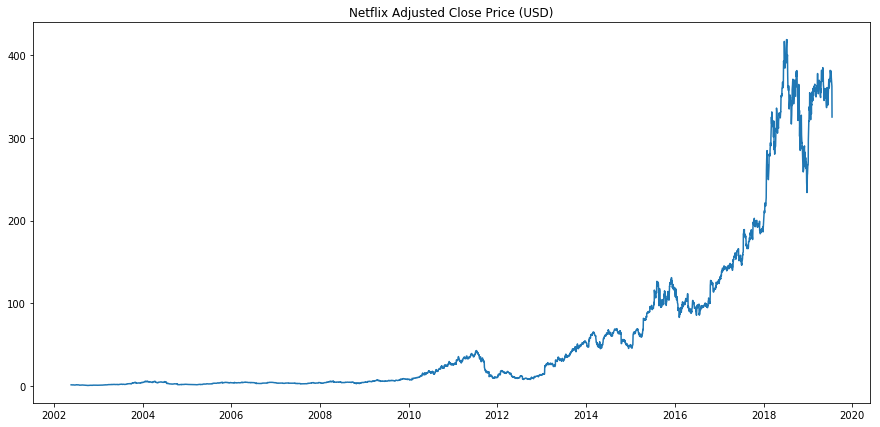

In [4]:
rcParams['figure.figsize'] = 15, 7
plt.plot(adj_close_data)
plt.title('{0} Adjusted Close Price (USD)'.format(name))
plt.show

-------------------------------------